In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from algorithms import pca_with_threshold, kernel_pca_with_threshold, incremental_pca_with_threshold
from main import get_dataset
import numpy as np

In [6]:
import numpy as np
from code.pca import PCA

# Create a sample dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Instantiate and apply PCA
pca = PCA()
X_transformed = pca.reduce_dim(X,threshold=0.99)

print("Principal Components:")
for c in pca.components.T:
    print(f"{ c}")
print("Principal Components Eigenvalues:\n", pca.eigenvalues)
print("Principal Components Explained Variance:\n", pca.explained_variance)
print("Transformed Data:\n", X_transformed)

Principal Components:
[0.6778734  0.73517866]
[-0.73517866  0.6778734 ]
Principal Components Eigenvalues:
 [1.28402771 0.0490834 ]
Principal Components Explained Variance:
 [0.96318131 0.03681869]
Transformed Data:
 [[ 0.82797019 -0.17511531]
 [-1.77758033  0.14285723]
 [ 0.99219749  0.38437499]
 [ 0.27421042  0.13041721]
 [ 1.67580142 -0.20949846]
 [ 0.9129491   0.17528244]
 [-0.09910944 -0.3498247 ]
 [-1.14457216  0.04641726]
 [-0.43804614  0.01776463]
 [-1.22382056 -0.16267529]]


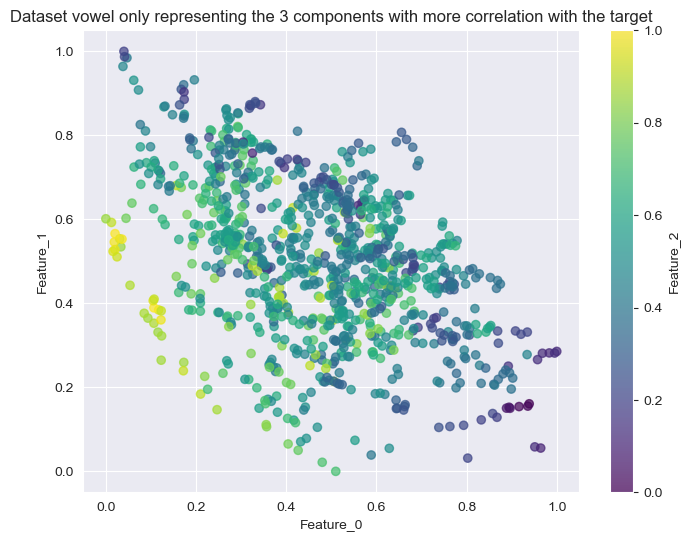

STEP 4: WRITE COVARIANCE MATRIX
[[ 2.49140546e-01  2.79386917e-02 -1.78184350e-02 -1.10290789e-02
   1.03134123e-02 -3.04013170e-02  2.98969772e-02 -2.87670039e-03
   3.84743179e-02  4.73591436e-02 -3.03066501e-02  3.11425683e-02
   3.11425683e-02  3.11425683e-02 -3.55915066e-02 -3.55915066e-02
   3.11425683e-02  3.11425683e-02  3.11425683e-02 -3.55915066e-02
   3.11425683e-02 -3.55915066e-02 -3.55915066e-02 -3.55915066e-02
   3.11425683e-02 -3.55915066e-02]
 [ 2.79386917e-02  4.14162728e-02 -1.67894842e-02 -1.46141859e-02
  -3.80029178e-03 -4.30044746e-03  5.97025350e-03  1.54991164e-03
   5.23721718e-03  1.08570351e-03 -4.12272554e-03  6.58500334e-04
   1.63031441e-03  1.25857185e-02 -8.00641561e-04 -2.86550968e-03
   9.50072973e-03  4.20263807e-03 -9.29932616e-04 -1.93257764e-04
  -1.76464134e-03 -1.58841243e-02  1.66725471e-03 -6.57895713e-03
   2.05536467e-03 -3.28345603e-03]
 [-1.78184350e-02 -1.67894842e-02  3.42770112e-02 -1.58269495e-03
  -1.94135852e-02 -1.06975817e-02 -1.107

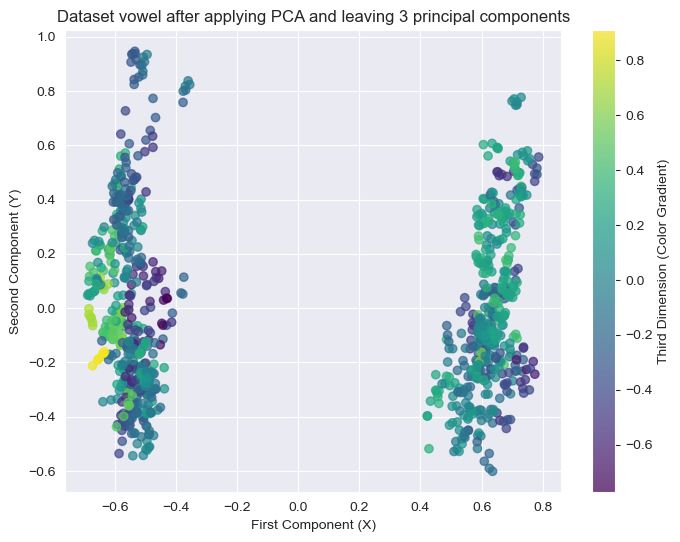

In [7]:
from code.preprocessing import get_dataset
from code.pca import PCA

# Step 1
dataset = "vowel"
x, y = get_dataset(dataset)
ds = x.copy()
ds["target"] = y

# Step 2
correlation_with_target = ds.corr()["target"] # Based on their correlation with the target
top_features = correlation_with_target.abs().sort_values(ascending=False).iloc[1:4]
top_features = top_features.index.tolist()
ds = ds.drop('target', axis=1)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(ds[top_features[0]], ds[top_features[1]], c=ds[top_features[2]], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label=f'{top_features[2]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Dataset {dataset} only representing the 3 components with more correlation with the target')
plt.show()

# Step 3 & 4 & 5 & 6 & 7 & 9
pca = PCA(verbose=True)
X_transformed = pca.reduce_dim(ds,threshold=0.90,n_components=3)

# Step 8
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=X_transformed[:,2], cmap='viridis', alpha=0.7)  # `viridis` is a color map, change as needed

# Add a color bar to show the gradient
plt.colorbar(scatter, label='Third Dimension (Color Gradient)')

plt.xlabel('First Component (X)')
plt.ylabel('Second Component (Y)')
plt.title(f'Dataset {dataset} after applying PCA and leaving 3 principal components')
plt.show()


In [17]:
pca = PCA(verbose=False)
X_transformed = pca.reduce_dim(ds,threshold=0.90,n_components=3)

pca.mean = pca.mean.values

X_reconstructed = pca.reconstruct(X_transformed)

print(X_reconstructed.shape)

(990, 26)


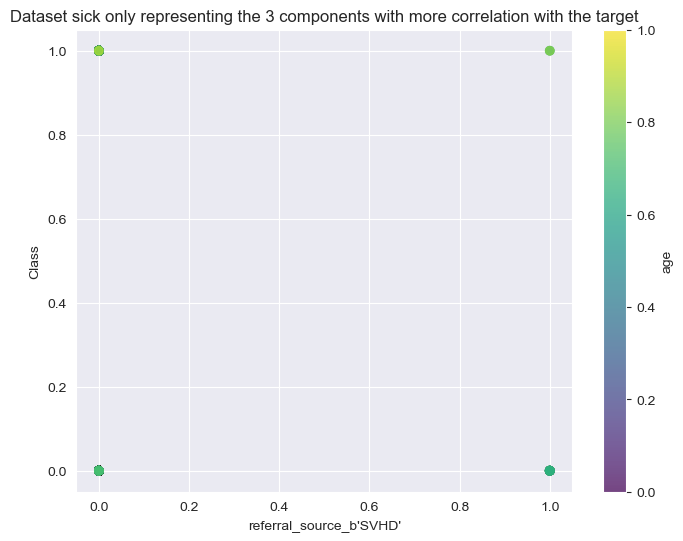

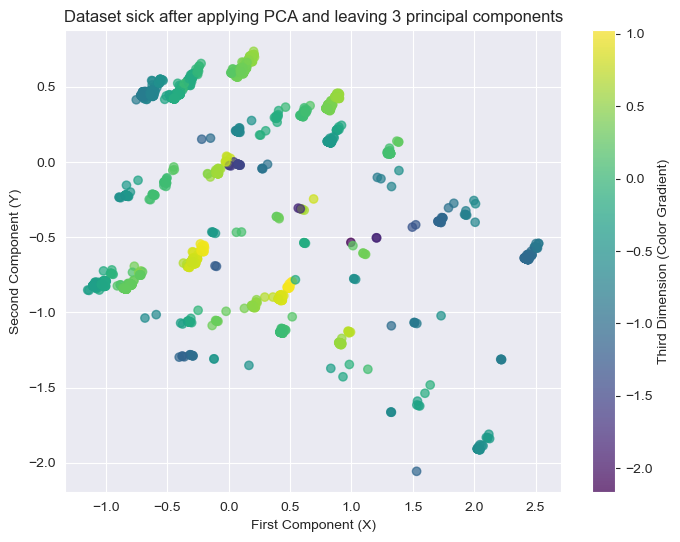

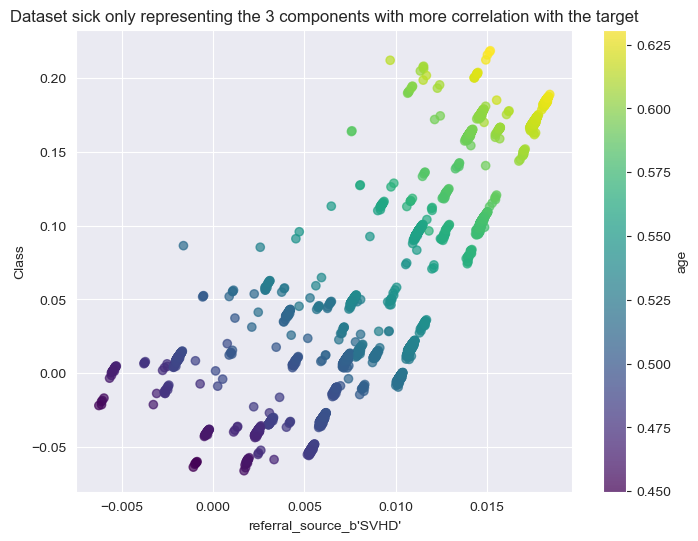

In [7]:
from sklearn import decomposition
# Step 1
dataset = "sick"
x, y = get_dataset(dataset)
ds = x.copy()
ds["target"] = y

# Step 2
correlation_with_target = ds.corr()["target"]  # Based on their correlation with the target
top_features = correlation_with_target.abs().sort_values(ascending=False).iloc[1:4].index.tolist()

ds = ds.drop('target', axis=1)
feature_indices = [ds.columns.get_loc(feature) for feature in top_features]  # Get indices of the features

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    ds.iloc[:, feature_indices[0]],  # Access by column index
    ds.iloc[:, feature_indices[1]],  # Access by column index
    c=ds.iloc[:, feature_indices[2]],  # Access by column index
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label=f'{top_features[2]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Dataset {dataset} only representing the 3 components with more correlation with the target')
plt.show()

# Step 3 & 4 & 5 & 6 & 7
pca = decomposition.PCA(n_components=3)  # Reduce to 3 components
X_transformed = pca.fit_transform(ds)

# Step 8
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=X_transformed[:, 2], cmap='viridis',alpha=0.7)  # `viridis` is a color map, change as needed

# Add a color bar to show the gradient
plt.colorbar(scatter, label='Third Dimension (Color Gradient)')

plt.xlabel('First Component (X)')
plt.ylabel('Second Component (Y)')
plt.title(f'Dataset {dataset} after applying PCA and leaving 3 principal components')
plt.show()

# Step 9
X_reconstructed = pca.inverse_transfdeorm(X_transformed)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X_reconstructed[:, feature_indices[0]],  # Access by column index
    X_reconstructed[:, feature_indices[1]],  # Access by column index
    c=X_reconstructed[:, feature_indices[2]],  # Access by column index
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label=f'{top_features[2]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Dataset {dataset} only representing the 3 components with more correlation with the target')
plt.show()

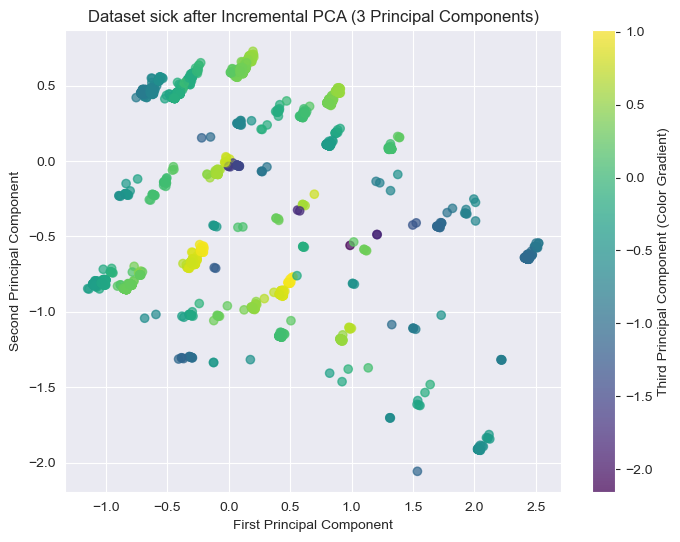

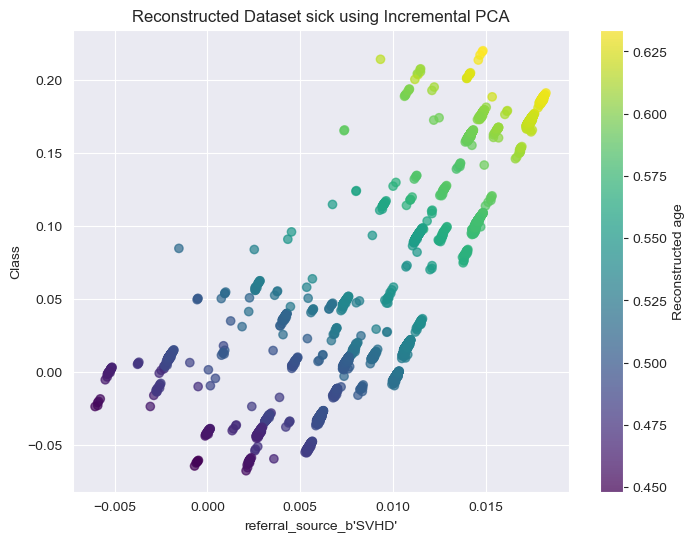

In [10]:
# Step 1: Load dataset
dataset = "sick"
x, y = get_dataset(dataset)
ds = x.copy()
ds["target"] = y

# Step 2: Select top features based on correlation with the target
correlation_with_target = ds.corr()["target"]  # Correlation with target
top_features = correlation_with_target.abs().sort_values(ascending=False).iloc[1:4].index.tolist()

# Extract feature indices for later use
ds = ds.drop('target', axis=1)
feature_indices = [ds.columns.get_loc(feature) for feature in top_features]

# Step 3: Apply Incremental PCA for dimensionality reduction
# Define mini-batches
batch_size = 100  # Set a batch size suitable for your system's memory
incremental_pca = decomposition.IncrementalPCA(n_components=3)

# Perform partial fit on mini-batches
for i in range(0, ds.shape[0], batch_size):
    batch = ds.iloc[i:i + batch_size]
    incremental_pca.partial_fit(batch)

# Transform the dataset in batches
X_transformed = np.vstack([
    incremental_pca.transform(ds.iloc[i:i + batch_size])
    for i in range(0, ds.shape[0], batch_size)
])

# Step 4: Scatter plot of PCA-transformed components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_transformed[:, 0],  # First principal component
    X_transformed[:, 1],  # Second principal component
    c=X_transformed[:, 2],  # Third principal component (as color gradient)
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Third Principal Component (Color Gradient)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'Dataset {dataset} after Incremental PCA (3 Principal Components)')
plt.show()

# Step 5: Reconstruct the original dataset from Incremental PCA components
X_reconstructed = np.vstack([
    incremental_pca.inverse_transform(X_transformed[i:i + batch_size])
    for i in range(0, X_transformed.shape[0], batch_size)
])

# Step 6: Visualize reconstructed features
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_reconstructed[:, feature_indices[0]],  # Reconstructed first feature
    X_reconstructed[:, feature_indices[1]],  # Reconstructed second feature
    c=X_reconstructed[:, feature_indices[2]],  # Reconstructed third feature (as color gradient)
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label=f'Reconstructed {top_features[2]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f'Reconstructed Dataset {dataset} using Incremental PCA')
plt.show()